# 01_data_exploration.ipynb

## Imports and Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Load the Dataset
df = pd.read_csv('../data/spotify_dataset.csv')  # Adjust path if needed
print("✅ Dataset loaded successfully!")

# Ignore "sus" attributes
# Also removed Artist(s), song, and album due to high variance.
trusted_columns = [
    'text', 'Length', 'emotion', 'Genre',
    'Release Date', 'Key', 'Tempo', 'Loudness (db)',
    'Time signature', 'Explicit', 'Popularity'
]
df = df[trusted_columns]

# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

✅ Dataset loaded successfully!


In [ ]:
df['emotion'].value_counts()

## Data Overview

In [3]:
print(f"\nDataset shape: {df.shape}")
print("\nColumns:")
print(df.columns)

print("\nSample rows:")
display(df.head())


Dataset shape: (498052, 11)

Columns:
Index(['text', 'length', 'emotion', 'genre', 'release_date', 'key', 'tempo',
       'loudness_(db)', 'time_signature', 'explicit', 'popularity'],
      dtype='object')

Sample rows:


,text,length,emotion,genre,release_date,key,tempo,loudness_(db),time_signature,explicit,popularity
0,Friends told her she was better off at the bot...,03:47,sadness,hip hop,2013-04-29,D min,0.437870,0.785065,4/4,No,40
1,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,2013-04-29,A# min,0.508876,0.805051,4/4,No,42
2,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,2004-06-08,A Maj,0.532544,0.799419,4/4,No,29
3,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,2015-10-16,A min,0.538462,0.811047,4/4,No,24
4,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,2015-10-16,F min,0.544379,0.808321,4/4,No,30


## Counting Null / Missing Values

In [4]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
text                   0
length                 0
emotion                0
genre                  0
release_date      147683
key                    0
tempo                  0
loudness_(db)          0
time_signature         8
explicit               0
popularity             0
dtype: int64


## Basic Descriptive Stats for Each Attribute

In [5]:
print("\nBasic statistics for numeric columns:")
display(df.describe())


Basic statistics for numeric columns:


,tempo,loudness_(db),popularity
count,498052.000000,498052.000000,498052.000000
mean,0.531244,0.762177,30.486453
std,0.173153,0.072970,17.189269
min,0.000000,0.000000,0.000000
25%,0.390533,0.728743,19.000000
50%,0.526627,0.777616,28.000000
75%,0.644970,0.811410,40.000000
max,1.000000,1.000000,100.000000


## Distribution of Key Features

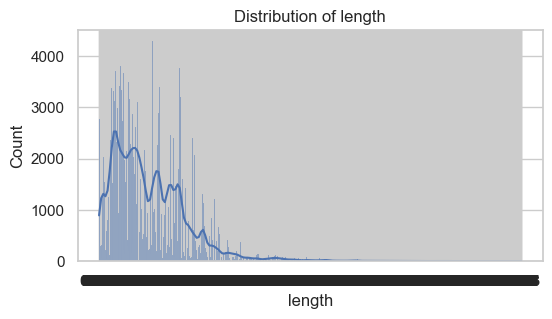

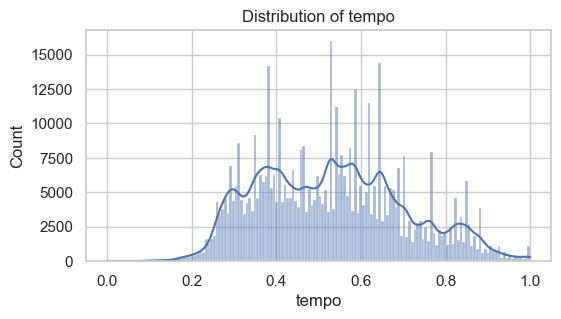

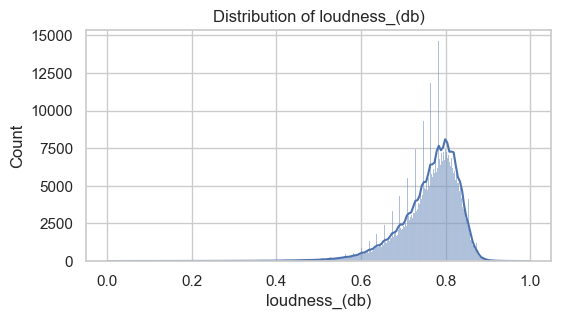

In [6]:
numerical_cols = ['length', 'tempo', 'loudness_(db)']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Categorical Counts

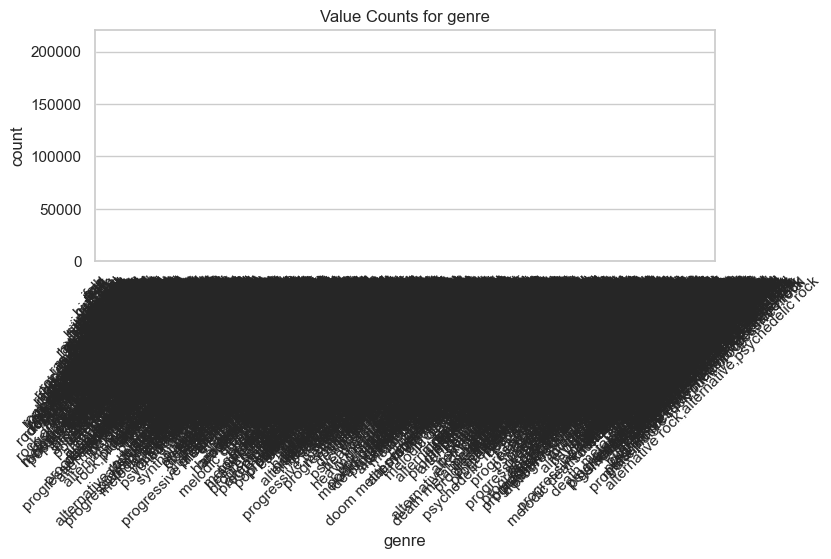

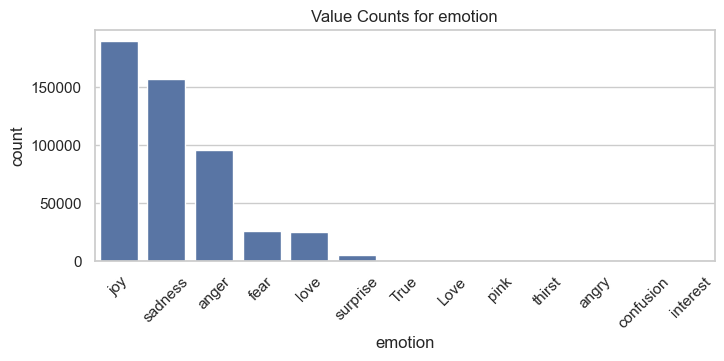

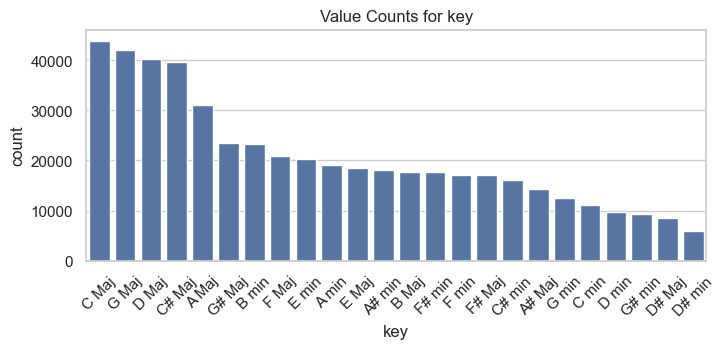

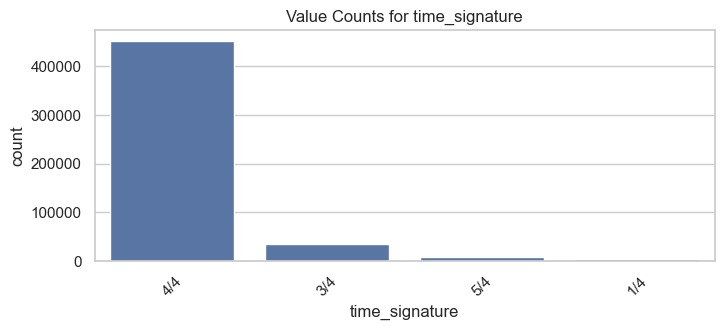

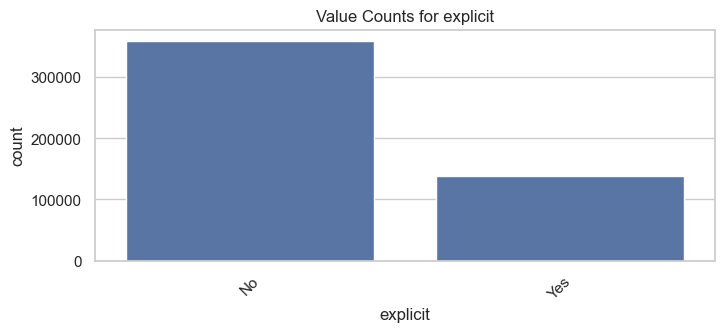

In [7]:
categorical_cols = ['genre', 'emotion', 'key', 'time_signature', 'explicit']

for col in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.show()

## Popularity Distribution

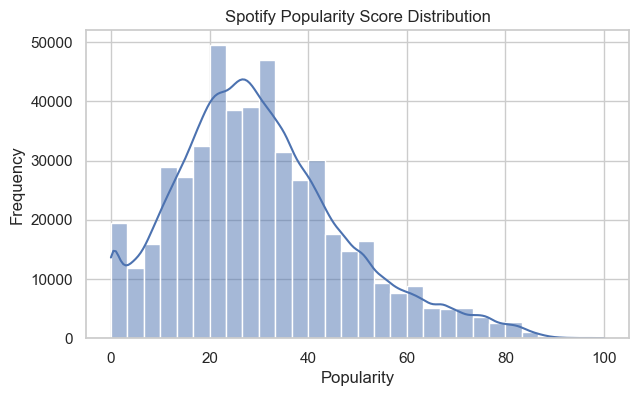

In [8]:
plt.figure(figsize=(7, 4))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Spotify Popularity Score Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

## Define Categorical Label for Popularity 

In [9]:
# These are apparently the standard thresholds for Spotify popularity analysis 
bins = [0, 25, 50, 70, 85, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['success_level'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=True)

print("✅ success_level column added")
print(df['success_level'].value_counts())

✅ success_level column added
success_level
Low          224120
Very Low     201597
Medium        49474
High          13026
Very High       819
Name: count, dtype: int64


In [ ]:
df['genre'].value_counts()

genre
hip hop                          210104
pop                               10376
country                            7308
folk                               4859
jazz                               3699
                                  ...  
pop,classical                         1
rock,jazz,alternative                 1
electronic,rap                        1
electronic,ambient,folk               1
pop punk,emo,alternative rock         1
Name: count, Length: 3097, dtype: int64